I compare the distribution of APM determined from solutions with different steps, to see if the number of steps used to generate the time series solution affects the distribution of APM.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join

A function to process the table.

In [2]:
def parse_apm_table(apm_tab, icrf3_def):
    
    mask = apm_tab["num_cln"] >= 5
    apm_tab = apm_tab[mask]

    # convert mas/yr into muas/yr
    apm_tab["pmra"] = apm_tab["pmra"] * 1e3
    apm_tab["pmra_err"] = apm_tab["pmra_err"] * 1e3
    apm_tab["pmdec"] = apm_tab["pmdec"] * 1e3
    apm_tab["pmdec_err"] = apm_tab["pmdec_err"] * 1e3
    
    apm_def = join(icrf3_def, apm_tab, keys="iers_name")
    
    return apm_tab, apm_def

ICRF3 defining source list

In [3]:
icrf3_def = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

In [4]:
apm_tab4 = Table.read("../data/ts_nju_pm_fit_3sigma.dat", format="ascii.csv")
apm_tab8 = Table.read("../data/ts_nju_pm_fit_3sigma-8step.dat", format="ascii.csv")
apm_tab10 = Table.read("../data/ts_nju_pm_fit_3sigma-10step.dat", format="ascii.csv")
apm_tab20 = Table.read("../data/ts_nju_pm_fit_3sigma-20step.dat", format="ascii.csv")

In [5]:
apm_tab4, apm_def4 = parse_apm_table(apm_tab4, icrf3_def)
apm_tab8, apm_def8 = parse_apm_table(apm_tab8, icrf3_def)
apm_tab10, apm_def10 = parse_apm_table(apm_tab10, icrf3_def)
apm_tab20, apm_def20 = parse_apm_table(apm_tab20, icrf3_def)

In [6]:
bin_array = np.arange(-100, 100, 5)
color = "grey"

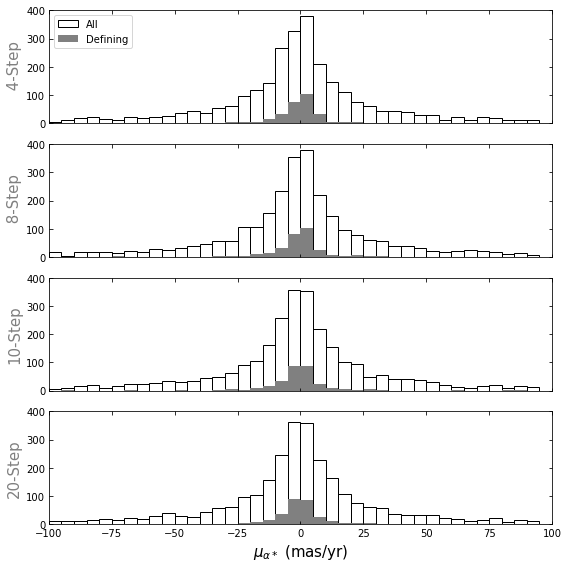

In [7]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(8, 8),
                                         nrows=4,
                                         sharex=True,
                                         sharey=True)

ax0.hist(apm_tab4["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax0.hist(apm_def4["pmra"], bins=bin_array, color=color, label="Defining")

ax1.hist(apm_tab8["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax1.hist(apm_def8["pmra"], bins=bin_array, color=color, label="Defining")

ax2.hist(apm_tab10["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax2.hist(apm_def10["pmra"], bins=bin_array, color=color, label="Defining")

ax3.hist(apm_tab20["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax3.hist(apm_def20["pmra"], bins=bin_array, color=color, label="Defining")

ax3.set_xlabel("$\\mu_{\\alpha*}$ (mas/yr)", fontsize=15)

ax0.set_ylabel(" 4-Step", color=color, fontsize=15)
ax1.set_ylabel(" 8-Step", color=color, fontsize=15)
ax2.set_ylabel("10-Step", color=color, fontsize=15)
ax3.set_ylabel("20-Step", color=color, fontsize=15)

ax3.axis([-100, 100, 0, 400])
ax0.legend(loc="upper left")

plt.tight_layout()

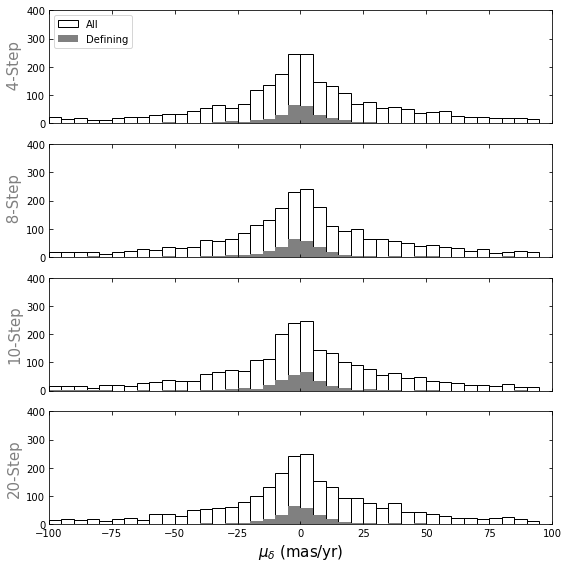

In [8]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(8, 8),
                                         nrows=4,
                                         sharex=True,
                                         sharey=True)

ax0.hist(apm_tab4["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax0.hist(apm_def4["pmdec"], bins=bin_array, color=color, label="Defining")

ax1.hist(apm_tab8["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax1.hist(apm_def8["pmdec"], bins=bin_array, color=color, label="Defining")

ax2.hist(apm_tab10["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax2.hist(apm_def10["pmdec"], bins=bin_array, color=color, label="Defining")

ax3.hist(apm_tab20["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax3.hist(apm_def20["pmdec"], bins=bin_array, color=color, label="Defining")

ax3.set_xlabel("$\\mu_{\\delta}$ (mas/yr)", fontsize=15)

ax0.set_ylabel(" 4-Step", color=color, fontsize=15)
ax1.set_ylabel(" 8-Step", color=color, fontsize=15)
ax2.set_ylabel("10-Step", color=color, fontsize=15)
ax3.set_ylabel("20-Step", color=color, fontsize=15)

ax3.axis([-100, 100, 0, 400])
ax0.legend(loc="upper left")

plt.tight_layout()

Now I will give some statistics for these apparent proper motion.

In [9]:
per = [0, 5, 10, 25, 50, 75, 90, 95, 100] 
line_fmt1 = " {:7d}" * len(per)

line_fmt2 = " {:7.1f}" * len(per)

For the right ascension component $\mu_{\alpha^*}$, the percentiles are give by an array of $Q_n$_ra.

In [10]:
Q4_ra = np.percentile(apm_tab4["pmra"], per)
Q8_ra = np.percentile(apm_tab8["pmra"], per)
Q10_ra = np.percentile(apm_tab10["pmra"], per)
Q20_ra = np.percentile(apm_tab20["pmra"], per)

Let's do the same for the declination component $\mu_\delta$

In [11]:
Q4_dec = np.percentile(apm_tab4["pmdec"], per)
Q8_dec = np.percentile(apm_tab8["pmdec"], per)
Q10_dec = np.percentile(apm_tab10["pmdec"], per)
Q20_dec = np.percentile(apm_tab20["pmdec"], per)

Print the statistics.

In [12]:
print("Apparent Proper Motion (muas/yr)")
print("(%)         ", line_fmt1.format(*per))

print("---------------------------------------"
      "----------------------------------------------")
print("R.A. ")
print(" 4-step sol ", line_fmt2.format(*Q4_ra))
print(" 8-step sol ", line_fmt2.format(*Q8_ra))
print("10-step sol ", line_fmt2.format(*Q10_ra))
print("20-step sol ", line_fmt2.format(*Q20_ra))

print("---------------------------------------"
      "----------------------------------------------")
print("Dec. ")
print(" 4-step sol ", line_fmt2.format(*Q4_dec))
print(" 8-step sol ", line_fmt2.format(*Q8_dec))
print("10-step sol ", line_fmt2.format(*Q10_dec))
print("20-step sol ", line_fmt2.format(*Q20_dec))

print("---------------------------------------"
      "----------------------------------------------")

Apparent Proper Motion (muas/yr)
(%)                 0       5      10      25      50      75      90      95     100
-------------------------------------------------------------------------------------
R.A. 
 4-step sol   -7301.4  -119.1   -59.9   -16.3    -0.2    14.7    56.4   110.5  9921.4
 8-step sol   -7336.2  -115.2   -58.9   -17.1    -0.3    14.5    57.1   112.4  9911.6
10-step sol   -7327.9  -117.0   -58.7   -15.9    -0.4    14.8    55.4   115.5  9909.6
20-step sol   -7329.5  -113.0   -58.0   -16.1    -0.2    14.3    55.0   111.6  9907.0
-------------------------------------------------------------------------------------
Dec. 
 4-step sol   -13855.4  -187.7   -96.5   -25.5     0.1    29.0    99.9   200.4 15678.8
 8-step sol   -13852.2  -198.7   -97.1   -24.6     0.5    29.7   100.6   196.6 16001.7
10-step sol   -13987.2  -185.7   -96.0   -25.5     0.3    28.8   103.9   200.3 15861.2
20-step sol   -13978.0  -184.9   -97.5   -25.2     0.4    28.9   100.7   196.2 15991.9
-----

Another thing I would like to know is that how many sources with an apparent proper motion smaller than $\mathrm{30\,\mu as\,yr^{-1}}$ in an absolute sense there are in the sample.

In [13]:
lim = 30

Calculate the fraction.

In [14]:
def calc_frac(apm_tab, key, lim):
    
    mask = (np.fabs(apm_tab[key]) < lim)
    frac = len(apm_tab[mask])/len(apm_tab)*100
    
    return frac

In [15]:
frac4_ra = calc_frac(apm_tab4, "pmra", lim)
frac8_ra = calc_frac(apm_tab8, "pmra", lim)
frac10_ra = calc_frac(apm_tab10, "pmra", lim)
frac20_ra = calc_frac(apm_tab20, "pmra", lim)

frac4_dec = calc_frac(apm_tab4, "pmdec", lim)
frac8_dec = calc_frac(apm_tab8, "pmdec", lim)
frac10_dec = calc_frac(apm_tab10, "pmdec", lim)
frac20_dec = calc_frac(apm_tab20, "pmdec", lim)

In [16]:
print("Fraction of sources with the APM in the range of [-{:2d}, {:2d}]".format(lim, lim))
print("Solution        %")

print("---------------------------------------"
      "----------------------------------------------")
print("R.A. ")
print(" 4-step sol   {:.2f}".format(frac4_ra))
print(" 8-step sol   {:.2f}".format(frac8_ra))
print("10-step sol   {:.2f}".format(frac10_ra))
print("20-step sol   {:.2f}".format(frac20_ra))

print("---------------------------------------"
      "----------------------------------------------")
print("Dec. ")
print(" 4-step sol   {:.2f}".format(frac4_dec))
print(" 8-step sol   {:.2f}".format(frac8_dec))
print("10-step sol   {:.2f}".format(frac10_dec))
print("20-step sol   {:.2f}".format(frac20_dec))

print("---------------------------------------"
      "----------------------------------------------")

Fraction of sources with the APM in the range of [-30, 30]
Solution        %
-------------------------------------------------------------------------------------
R.A. 
 4-step sol   66.31
 8-step sol   65.95
10-step sol   66.05
20-step sol   66.69
-------------------------------------------------------------------------------------
Dec. 
 4-step sol   52.04
 8-step sol   52.34
10-step sol   52.57
20-step sol   52.50
-------------------------------------------------------------------------------------


I then calculate the `mean`, `median`, and `standard deviation` for these data sets.

In [17]:
def simple_apm_stats(apm_tab, apm_def):

    # For all sources
    num_all = len(apm_tab)
    mean_pmra_all = np.mean(apm_tab["pmra"])
    median_pmra_all = np.median(apm_tab["pmra"])
    std_pmra_all = np.std(apm_tab["pmra"])

    mean_pmdec_all = np.mean(apm_tab["pmdec"])
    median_pmdec_all = np.median(apm_tab["pmdec"])
    std_pmdec_all = np.std(apm_tab["pmdec"])

    # For defining sources only
    num_def = len(apm_def)
    mean_pmra_def = np.mean(apm_def["pmra"])
    median_pmra_def = np.median(apm_def["pmra"])
    std_pmra_def = np.std(apm_def["pmra"])

    mean_pmdec_def = np.mean(apm_def["pmdec"])
    median_pmdec_def = np.median(apm_def["pmdec"])
    std_pmdec_def = np.std(apm_def["pmdec"])

    # Format the output
    line_format = "{:5d}  {:6.2f}  {:6.2f}  {:6.2f} "

    line_ra_all = line_format.format(
        num_all, mean_pmra_all, median_pmra_all, std_pmra_all)
    line_dec_all = line_format.format(
        num_all, mean_pmdec_all, median_pmdec_all, std_pmdec_all)
    line_ra_def = line_format.format(
        num_def, mean_pmra_def, median_pmra_def, std_pmra_def)
    line_dec_def = line_format.format(
        num_def, mean_pmdec_def, median_pmdec_def, std_pmdec_def)

    line_ra = line_ra_all + line_ra_def
    line_dec = line_dec_all + line_dec_def

    return line_ra, line_dec

In [18]:
line4_ra, line4_dec = simple_apm_stats(apm_tab4, apm_def4)
line8_ra, line8_dec = simple_apm_stats(apm_tab8, apm_def8)
line10_ra, line10_dec = simple_apm_stats(apm_tab10, apm_def10)
line20_ra, line20_dec = simple_apm_stats(apm_tab20, apm_def20)

/Users/Neo/scisoft/opt64/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [19]:
print("========================================"
      "============================================")
print("                        All                    ICRF3 defining")
print("             ---------------------------   ---------------------------")
print("Solution     Nb_sou  Mean  Median  Std     Nb_sou  Mean  Median  Std")
print("R.A.")
print(" 4-step sol {:s}".format(line4_ra))
print(" 8-step sol {:s}".format(line8_ra))
print("10-step sol {:s}".format(line10_ra))
print("20-step sol {:s}".format(line20_ra))

print("---------------------------------------"
      "----------------------------------------------")
print("Dec. ")
print(" 4-step sol {:s}".format(line4_dec))
print(" 8-step sol {:s}".format(line8_dec))
print("10-step sol {:s}".format(line10_dec))
print("20-step sol {:s}".format(line20_dec))

print("---------------------------------------"
      "----------------------------------------------")
print("Unit: muas/yr")

                        All                    ICRF3 defining
             ---------------------------   ---------------------------
Solution     Nb_sou  Mean  Median  Std     Nb_sou  Mean  Median  Std
R.A.
 4-step sol  3013   -0.54   -0.25  288.33   299    0.38    0.30   20.31 
 8-step sol  3013   -0.51   -0.31  287.16   299    0.52    0.06   19.26 
10-step sol  3034   -0.29   -0.35  286.88   299   -0.75   -0.57   21.34 
20-step sol  3038   -0.55   -0.23  286.13   299    0.56   -0.22   19.20 
-------------------------------------------------------------------------------------
Dec. 
 4-step sol  3013   -1.29    0.14  502.22   299   -2.57   -0.46   40.74 
 8-step sol  3013   -2.02    0.47  504.74   299   -4.41   -0.57   33.95 
10-step sol  3034   -1.17    0.27  502.32   299   -6.28   -0.33   53.80 
20-step sol  3038   -1.85    0.39  502.89   299   -3.12   -0.59   30.15 
-------------------------------------------------------------------------------------
Unit: muas/yr
